<p style="text-align: center;"><strong>Bosch Production Line Performance</strong></p>
<p style="text-align: center;"><strong>Data Story</strong></p>



[From Kaggle](http://www.kaggle.com/c/bosch-production-line-performance/overview)

A good chocolate soufflé is decadent, delicious, and delicate. But, it's a challenge to prepare. When you pull a disappointingly deflated dessert out of the oven, you instinctively retrace your steps to identify at what point you went wrong. Bosch, one of the world's leading manufacturing companies, ensures that the recipes for the production of its advanced mechanical components are of the highest quality and safety standards. Part of doing so is closely monitoring its parts as they progress through the manufacturing processes.

<img src="reports/img/BoschManufacturingKaggleImage.jpg" style="height:400px">

Because Bosch records data at every step along its assembly lines, they have the ability to apply advanced analytics to improve these manufacturing processes. However, the intricacies of the data and complexities of the production line pose problems for current analytical methods.

The goal is to predict internal failures using thousands of measurements and tests made for each component along the assembly line. This would enable Bosch to bring quality products at lower costs to the end user.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#General-overview" data-toc-modified-id="General-overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General overview</a></span></li><li><span><a href="#Features-(production-measurements-/-columns)" data-toc-modified-id="Features-(production-measurements-/-columns)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Features (production measurements / columns)</a></span></li><li><span><a href="#Comparison-of-training-and-test-data" data-toc-modified-id="Comparison-of-training-and-test-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of training and test data</a></span><ul class="toc-item"><li><span><a href="#Volume-of-product-through-lines" data-toc-modified-id="Volume-of-product-through-lines-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Volume of product through lines</a></span></li><li><span><a href="#Volume-of-product-through-stations" data-toc-modified-id="Volume-of-product-through-stations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Volume of product through stations</a></span></li></ul></li><li><span><a href="#Product-failures" data-toc-modified-id="Product-failures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Product failures</a></span><ul class="toc-item"><li><span><a href="#Product-failures-per-line" data-toc-modified-id="Product-failures-per-line-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Product failures per line</a></span></li><li><span><a href="#Product-failures-per-station" data-toc-modified-id="Product-failures-per-station-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Product failures per station</a></span></li><li><span><a href="#Product-failure-patterns" data-toc-modified-id="Product-failure-patterns-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Product failure patterns</a></span></li><li><span><a href="#Multiple-products-with-identical-measurements" data-toc-modified-id="Multiple-products-with-identical-measurements-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Multiple products with identical measurements</a></span></li></ul></li><li><span><a href="#Dates" data-toc-modified-id="Dates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dates</a></span></li><li><span><a href="#Conculsion" data-toc-modified-id="Conculsion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conculsion</a></span></li></ul></div>

## Objective

The objective is to help a manufacturing plant identify defective products utilizing the provided production data.  Our work will be evaluated using the Matthews Correlation Coefficient:

<img src="reports/img/mcc_formula.jpg" style="height:50px">

Where:
* TP = true positive (we predicted positive and it was!)
* TN = true negative (we predicted negative and it was!)
* FP = false positive (we predicted positive but it was actually negative)
* FN = false negative (we predicted negative but it was actually positive)


Bosch provided this data for a Kaggle competition.  Kaggle is a platform for researchers, statisticians and data miners to compete to find the best method for predicting outcomes, in this case product failures.  Bosch only provided product failure information for the training rows (each row is a individual product) and expects the competitors to develop a model utilizing the training rows and submit a prediction on the testing rows. After this project is complete, I will be providing a submission to Kaggle and will update the project with the results.

First we'll perform some housekeeping and get our jupyter notebook (this file) ready and then we'll get familiar with the production data provided.

In [1]:
import pandas as pd
import os, sys

os.chdir(sys.path[0]+'/code')  # allows all .py paths to work properly

from ds import bar_plot
from ds import data_overview
import getdata

# from matplotlib.pyplot import figure
%matplotlib inline

## General overview

We know few specifics about the production data other than the context provided above from Bosch and Kaggle, however we do know the objective and it is critical we keep that top of mind: 
> **Predict product failures by utilizing the provided data**

Let's get started by taking a broad overview of the production data provided:

In [2]:
data_overview()

 
Product Data (rows)
   Training rows:                       1,183,747
   Testing rows:                        1,183,748
   Total rows:                                              2,367,495


Features (columns)
   Numeric Features:                          968
   Date Features:                           1,156
   Total Features:                                              2,124


Various Statistics
   Failed Products (rows):                  6,879
   Total Products (rows):               1,183,747
   Failure Rate:                                                1/172
   Failure Rate Percent:                                        0.58%


   ~Potential Data Elements (features x rows):          5,028,559,380




We have production data with failure information for 1,183,748 individual products (rows) and each product could theoretically have 4,264 measurements (features / columns) during the production process.

For every 172 products manufactured, one product fails making predicting failures more challenging.  

## Features (production measurements / columns)

For ease of discussion, I will often refer to a part as an **Id** and each measurement taken for a part as a **Feature**.  For an easy visual representation, picture all the  the ids listed down a page with all the features listed next to the id across the page OR picture all the individual parts listed down a page with all the measurements listed next to the part across the page.  The lists are identical other then terminology. The image below is from the Bosch training dataset and shows the individual id in rows and the features in columns. <img src="reports/img/row_col_example1.jpg" style="height:200px">

From the [Kaggle website](https://www.kaggle.com/c/bosch-production-line-performance/data), we know that the Bosch plant is organized into four production **Lines**.  Each production line is comprised of multiple **Stations** and each station is responsible for performing various processes on a part resulting in multiple **Features** (measurements).
>The dataset contains an extremely large number of anonymized features. Features are named according to a convention that tells you the production line, the station on the line, and a feature number. E.g. L3_S36_F3939 is a feature measured on line 3, station 36, and is feature number 3939.

For example, the first Id (#4) had it's second measurement taken at Line 0, Station 0 and Feature 2.  

## Comparison of training and test data

### Volume of product through lines

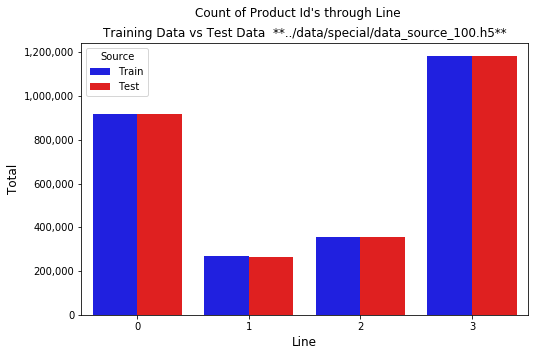

In [3]:
bar_plot('count_id_per_line')

The test and train data mirror each other with respect to the volume of product that travels through each line.  Let consider the same question but checking over stations.  

### Volume of product through stations

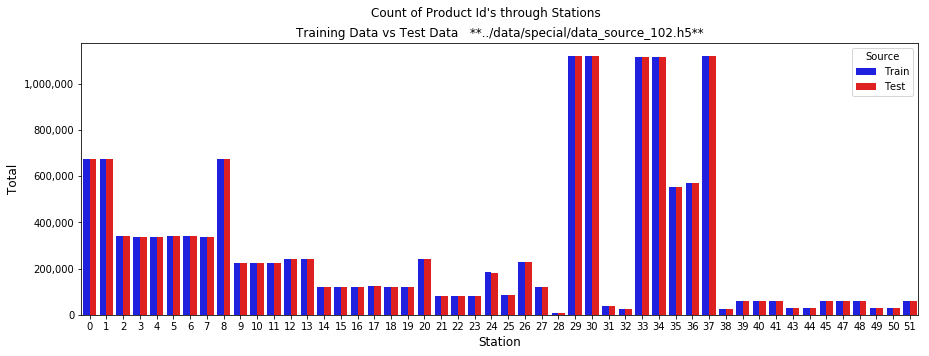

In [4]:
bar_plot('count_id_per_station')

The test and train data again mirror each other with respect to the volume of product that travels through each station.

With some inspection, it is very plausible Bosch produced 2,367,497 individual products manufactured over an undefined period (more on that soon), shuffled the order, gave each product a new Id starting at Id = 1 and randomly selected 1/2 of the parts for the test dataset. The first image below is from the training dataset and the second image is from the test dataset.  If the two datasets were combined, the numbers would be continuous.

<img src="reports/img/row_col_example1.jpg" style="height:200px">
<img src="reports/img/row_col_example2.jpg" style="height:200px">

It certainly appears the train dataset is representative of the test dataset.  Let's move away from comparing the test and train datasets and take a closure look at product failures in the train dataset.

## Product failures

### Product failures per line

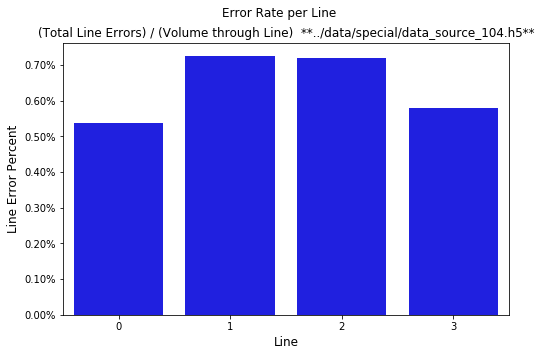

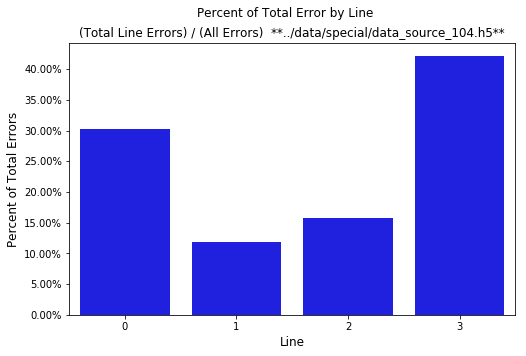

In [5]:
bar_plot('error_rate_per_line')
bar_plot('total_errors_per_line')

Although stations 0 and 3 are responsible for a higher percentage of errors, they also produce more product.  There is a difference in the error rate per line but it is not overwhelming.  

### Product failures per station

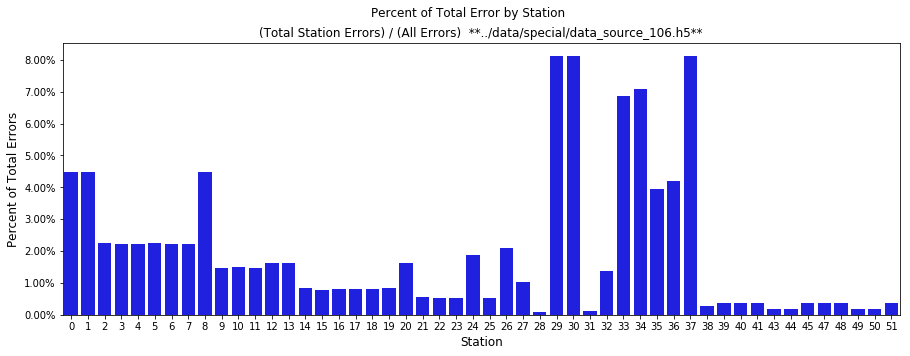

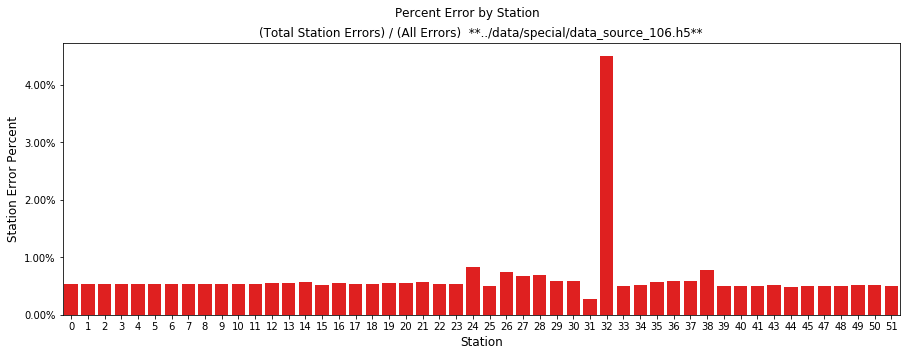

In [6]:
bar_plot('pct_total_error_per_station')
bar_plot('pct_error_per_station')

It is clear something different is happening at station 32.  Although it is not significant when looking at the total percentage of errors because it processes a low volume of parts, 4% of that parts that go through station 32 are defective.  This is a failure rate ~8 times the average failure rate.  This will certainly be one area of focus as we develop the prediction model.

### Product failure patterns

In [7]:
data = getattr(getdata, 'load_target')()
data.reset_index(inplace=True)
failed_data = pd.DataFrame({'Id':sorted(data[data['Response']==1]['Id'].values)})
failed_data['count_to_fail'] = failed_data['Id'] - failed_data['Id'].shift(1)

print(f'Total Products: {len(data):>11,}')
print(f'Failed Products: {len(failed_data):>10,}')
print(f'Failure Rate: {len(failed_data) / len(data):>17.2%} or 1/{round(1/(len(failed_data) / len(data)),0):.0f}')

Total Products:   1,183,747
Failed Products:      6,879
Failure Rate:             0.58% or 1/172


We are looking for any patterns in the failures that we can utilize to make better predictions.  If a part failed randomly, we know 1 part would fail for every 172 parts produced. Assuming we just experienced a failure, the likelihood of having another failure immediately are 1/172.  Which also means if failures occur randomly, seeing two consecutive failures would occur approximately one time for every ~30,000 (172 * 172) parts produced.  If true, we would expect to see two failures in a row ~40 times (1,183,747 / 30,000) in our entire training data set.  Through visual inspection of the dataset, there appears to be a much higher rate of failures happening consecutively.  Let's take a look:

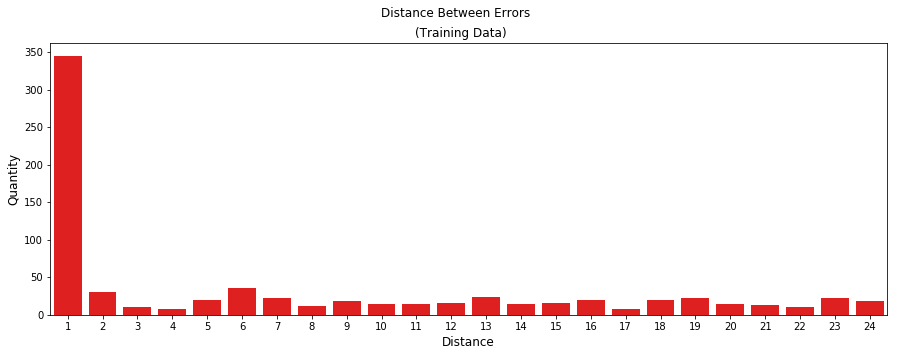

In [8]:
df = pd.DataFrame(failed_data['count_to_fail'].value_counts()).reset_index()
bar_plot('count_to_fail', data=df)

The graph above shows 345 consecutive failures, much higher then the expected value of 40 if the failures were random.  As we explore the date features, the occurrence of consecutive failures on id puzzling because the production rows appear to have been randomized before assigning consecutive ids.  With a quick visual search, it seems like certain groups of ids were not randomized and remained together.  One hypothesis is the products that stayed together had identical measurements.  This requires more investigation but I anticipate this will be a significant predictive features of our model.

### Multiple products with identical measurements

In [9]:
data = getattr(getdata, 'tr_nu_o')()
total_products = len(data)
print(f'Total Products: {total_products:>14,}')
data.reset_index(drop=True, inplace=True)
data.drop_duplicates(inplace=True)
unique_products = len(data)
print(f'Unique Products: {unique_products:>13,}')
print(f'Duplicate Products: {total_products - unique_products:>10,} {(total_products - unique_products) / total_products:>8.2%}')

Total Products:      1,183,747
Unique Products:     1,158,289
Duplicate Products:     25,458    2.15%


We have 25,458 products (2.15% of our total training data) with identical measurements with at least one other id.  If the measurements are valuable for predicting failures, it would be logical that parts with identical measurements would share the same outcome (e.g. failure or not).  This requires more investigation but I anticipate this too could become a significant predictive features of our model.

## Dates

The date measurements were recorded as a two decimal number, for example 157.14.  After extracting and sorting the date features, gaps could be identified in the measurements and it became easy with a little experimentation to identify weekends and ultimately conclude that each .01 represents 6 minutes.  With a little more experimentation it became clear (at least highly likely) the times represented January 1st, 2014 through December 31st, 2015.

In [10]:
df = getattr(getdata, 'data_source_108')()
df.head()

,Date_Only,Year,Counter
0,2014-01-01,2014,10816
1,2014-01-02,2014,7891
2,2014-01-03,2014,4683
3,2014-01-05,2014,570
4,2014-01-06,2014,2029


<img src="reports/img/date_example1-1.jpg" style="height:600px">

This information allows creation of additional features including:

* Start/stop time for production
* Did production cross a weekend or quarter end
* Total production time
* Time of day 
* Week number
* Day of week
* Month

## Conculsion

To summarize the more noteworthy findings, the dataset is sizable, the overall product failure rate is very low, the train dataset is representative of the test dataset, station 32 has a higher percentage failure rate, failures often occur in consecutive id numbers, a portion of our training dataset is not unique, and the date measurements will provide us an opportunity to create a wealth of other features.